In [25]:
import numpy as np
import os
import time
import random
import torch
from Model import Market_Env


from TD3 import utils
from TD3 import TD3
from TD3 import OurDDPG
from TD3 import DDPG


In [26]:
model_file = r"./models/TD3_latest"
fund_return_src = r'./data/Monthly_Fund_Return_Selected.csv'
feature_src = r'./data/FEATURE.csv'
fund_map_src =r'./data/FUND_MAP_SELECTED.csv'

env =Market_Env(feature_src,fund_map_src,fund_return_src)

# Set seeds
rand_seed =random.randint(0x00000000,0xFFFFFFFF)
env.seed(rand_seed)
torch.manual_seed(rand_seed)
np.random.seed(rand_seed)

state_dim = env.state_dim
action_dim = env.action_dim
max_action = env.max_action
policy_noise =0.2
noise_clip = 0.5
policy_freq =2

kwargs = {
    "state_dim": state_dim,
    "action_dim": action_dim,
    "max_action": max_action,
    "discount": 0.9,
    "tau": 0.005,
}


policy_name="TD3"

if (policy_name=="TD3"):
    kwargs["policy_noise"] = policy_noise * max_action
    kwargs["noise_clip"] = noise_clip * max_action
    kwargs["policy_freq"] = policy_freq
    policy = TD3.TD3(**kwargs)
    policy.load(model_file)
elif(policy_name=="DDPG"):
    policy = OurDDPG.DDPG(**kwargs)
    policy.load(model_file)


In [27]:
state, done = env.reset(validation=True), False
#for parameter in policy.actor_target.parameters():
#    print(parameter)
while not done:
    action = policy.select_action(np.array(state))
    print(np.array(state))
    print(action)
    action = action+0*np.random.randn(len(action))
    state, reward, done = env.step(action)
    #print(reward)
    time.sleep(.1)
#print(env.profilios)
#profilios = env.profilios
#print (profilios[0])

[0.47287127 0.636499   0.02588332 0.04233135 0.76852443 0.2073108
 0.33185111 0.30823006]
[-0.46587285  0.10858864 -0.07388461  0.3252578  -0.525073    0.09022922
  0.28699452 -0.14729525 -0.2752921  -0.08675572 -0.5543845  -0.09903649
  0.7011372  -0.46835726  0.11883371  0.1797286 ]
[0.42258604 0.52030767 0.12736241 0.19532864 0.71699862 0.25123649
 0.38365811 0.25600624]
[-0.5073455   0.19210204  0.03103586  0.37064493 -0.51550305 -0.01207482
  0.304522   -0.14852421 -0.33337384 -0.08041474 -0.5500243  -0.07533553
  0.6544517  -0.3423631   0.1402345   0.14222701]
[0.61294048 0.70167645 0.05053414 0.05735069 0.76454161 0.24771115
 0.35583634 0.25526969]
[-0.47612366  0.01712055 -0.18074204  0.3720745  -0.6213444   0.07652802
  0.30001816 -0.14691067 -0.2932605   0.01313409 -0.5826531  -0.1466101
  0.7393726  -0.49185714  0.1728908   0.15781806]
[0.35856945 0.51947676 0.07600657 0.0844462  0.70884915 0.29651542
 0.3594495  0.25318595]
[-0.39115083  0.16696231  0.08477331  0.36055505 -

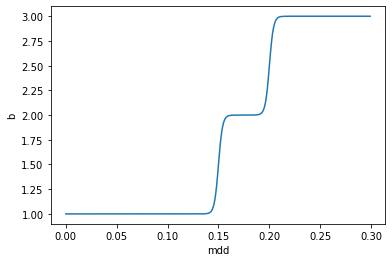

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,0.3,0.001)   # start,stop,step
y = 1+1/(1+np.exp(-(x-0.15)*500))+1/(1+np.exp(-(x-0.2)*500))

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('mdd')
ax.set_ylabel('b')
ax.plot(x,y)
plt.show()

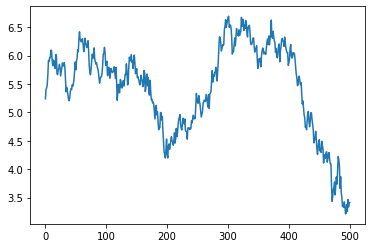

In [41]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

evaluation = './results/TD3_18000_evaluations.npy'
reward = './results/TD3_18000_episode_rewards.npy'
a = np.load(evaluation)
b = np.load(reward)
#plt.plot(a)
plt.plot(moving_average(b,100))